In [1]:
import sys
import torch

from tqdm import tqdm

In [2]:
sys.path.insert(0, '/home/brendalf/Documents/projects/gan-attack/src')

In [3]:
import os
from skimage.transform import resize
from skimage import io
from tqdm import tqdm
from skimage.util import img_as_ubyte

In [4]:
new_directory = '../data/imagenet'

In [5]:
if not os.path.exists(new_directory):
    os.mkdir(new_directory)

In [6]:
old_directory = '/media/brendalf/storage-ext4/imagenet/2012/training_imgs'

In [7]:
directories = os.listdir(old_directory)

In [8]:
for i, directory in enumerate(directories):
    source_dir = os.path.join(old_directory, directory)
    target_dir = os.path.join(new_directory, directory)

    if not os.path.exists(target_dir):
        os.mkdir(target_dir)

    image_files = os.listdir(source_dir)

    for image_file in image_files:
        try:
            image = io.imread(
                os.path.join(source_dir, image_file)
            )

            new_image = resize(image, (32, 32), anti_aliasing=True)
            new_image = img_as_ubyte(new_image)

            io.imsave(
                os.path.join(target_dir, image_file),
                new_image
            )
        except:
            pass

In [9]:
import torchvision

In [10]:
data_train = torchvision.datasets.ImageFolder(
    new_directory,
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor()
    ])
)

In [11]:
BATCH_SIZE = 128

train_loader = torch.utils.data.DataLoader(
    data_train,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2
)

In [15]:
import numpy as np

In [13]:
import matplotlib.pyplot as plt

In [17]:
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

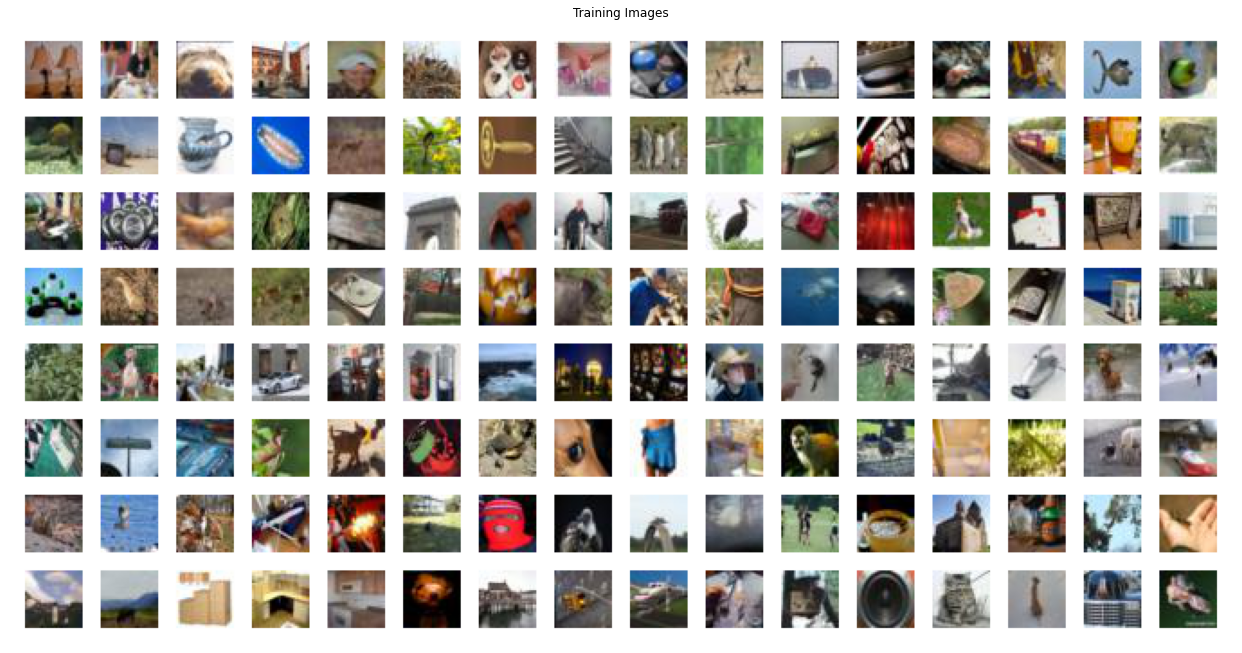

In [18]:
from math import sqrt

real_batch = next(iter(train_loader))

plt.figure(figsize=(22, 12))
plt.axis('off')
plt.title('Training Images')

plt.imshow(
    np.transpose(
        torchvision.utils.make_grid(
            real_batch[0].to(device),
            padding=10,
            normalize=True,
            pad_value=1,
            nrow=int(3 * sqrt(BATCH_SIZE) / 2)
        ).cpu(),
        (1, 2, 0)
    )
);